# Task
Convert this data into a graph

Here is all the data you need:
"citing.txt"
"musae_git_edges.csv"
"musae_git_features.json"
"musae_git_target.csv"
"README.txt"

## Data loading

### Subtask:
Load the provided CSV and JSON files into pandas DataFrames.


**Reasoning**:
Load the provided CSV and JSON files into pandas DataFrames and print the first few rows of each to verify.



In [1]:
import pandas as pd
import json

# Load musae_git_edges.csv
try:
    df_edges = pd.read_csv('musae_git_edges.csv')
    display(df_edges.head())
except FileNotFoundError:
    print("Error: musae_git_edges.csv not found.")
    df_edges = None

# Load musae_git_features.json
try:
    with open('musae_git_features.json', 'r') as f:
        data = json.load(f)
    df_features = pd.DataFrame.from_dict(data, orient='index')
    display(df_features.head())
except FileNotFoundError:
    print("Error: musae_git_features.json not found.")
    df_features = None
except json.JSONDecodeError:
    print("Error: Invalid JSON format in musae_git_features.json")
    df_features = None

# Load musae_git_target.csv
try:
    df_target = pd.read_csv('musae_git_target.csv')
    display(df_target.head())
except FileNotFoundError:
    print("Error: musae_git_target.csv not found.")
    df_target = None

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1574,3773,3571,2672,2478,2534,3129,3077,1171.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1574,3773,925,1728,2815,2963,3077,364,1171.0,536.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3964,3773,4003,928,1852,3077,364,1022,3763.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1929,3773,1793,3511,1290,3129,3077,364,1171.0,1022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1


## Data exploration

### Subtask:
Explore the loaded dataframes (`df_edges`, `df_features`, and `df_target`) to understand their structure, identify key columns, and determine the relationships between them.


**Reasoning**:
Inspect the dataframes to understand their structure, identify key columns, and determine relationships between them.  This includes examining shapes, data types, descriptive statistics, and unique values in potential identifier columns.



In [2]:
# Inspect the shape and data types of each DataFrame
print("df_edges shape:", df_edges.shape)
print("df_edges info:")
display(df_edges.info())

print("\ndf_features shape:", df_features.shape)
print("df_features info:")
display(df_features.info())

print("\ndf_target shape:", df_target.shape)
print("df_target info:")
display(df_target.info())


# Identify node and edge columns
print("\ndf_edges unique values in id_1:", df_edges['id_1'].nunique())
print("df_edges unique values in id_2:", df_edges['id_2'].nunique())

print("\ndf_features index (potential node IDs):", df_features.index.nunique())
print("First 5 values of the df_features index:", df_features.index.unique()[:5])

print("\ndf_target unique values in id:", df_target['id'].nunique())
print("First 5 values of the id column in df_target:", df_target['id'].unique()[:5])

# Relationship analysis: check for missing values and inconsistencies
print("\nMissing values in df_edges:", df_edges.isnull().sum().sum())
print("Missing values in df_features:", df_features.isnull().sum().sum())
print("Missing values in df_target:", df_target.isnull().sum().sum())

# Visual inspection
print("\nFirst 5 rows of df_edges:")
display(df_edges.head())

print("\nFirst 5 rows of df_features:")
display(df_features.head())

print("\nFirst 5 rows of df_target:")
display(df_target.head())

df_edges shape: (289003, 2)
df_edges info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289003 entries, 0 to 289002
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id_1    289003 non-null  int64
 1   id_2    289003 non-null  int64
dtypes: int64(2)
memory usage: 4.4 MB


None


df_features shape: (37700, 42)
df_features info:
<class 'pandas.core.frame.DataFrame'>
Index: 37700 entries, 0 to 37699
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       37700 non-null  int64  
 1   1       37700 non-null  int64  
 2   2       37700 non-null  int64  
 3   3       37700 non-null  int64  
 4   4       37700 non-null  int64  
 5   5       37700 non-null  int64  
 6   6       37700 non-null  int64  
 7   7       37700 non-null  int64  
 8   8       37698 non-null  float64
 9   9       37686 non-null  float64
 10  10      37628 non-null  float64
 11  11      37437 non-null  float64
 12  12      36861 non-null  float64
 13  13      35520 non-null  float64
 14  14      33063 non-null  float64
 15  15      29394 non-null  float64
 16  16      24912 non-null  float64
 17  17      20306 non-null  float64
 18  18      15898 non-null  float64
 19  19      12129 non-null  float64
 20  20      9012 non-null   flo

None


df_target shape: (37700, 3)
df_target info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37700 entries, 0 to 37699
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         37700 non-null  int64 
 1   name       37700 non-null  object
 2   ml_target  37700 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 883.7+ KB


None


df_edges unique values in id_1: 30855
df_edges unique values in id_2: 30195

df_features index (potential node IDs): 37700
First 5 values of the df_features index: Index(['0', '1', '2', '3', '4'], dtype='object')

df_target unique values in id: 37700
First 5 values of the id column in df_target: [0 1 2 3 4]

Missing values in df_edges: 0
Missing values in df_features: 893026
Missing values in df_target: 0

First 5 rows of df_edges:


,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982



First 5 rows of df_features:


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1574,3773,3571,2672,2478,2534,3129,3077,1171.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1574,3773,925,1728,2815,2963,3077,364,1171.0,536.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3964,3773,4003,928,1852,3077,364,1022,3763.0,2045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1929,3773,1793,3511,1290,3129,3077,364,1171.0,1022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



First 5 rows of df_target:


,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1


## Data wrangling

### Subtask:
Merge the three dataframes: `df_edges`, `df_features`, and `df_target` into a single dataframe suitable for graph creation.


**Reasoning**:
Convert the index of `df_features` to numeric and merge the three dataframes. Handle potential errors during index conversion and missing values after merging.



In [3]:
# Convert the index of df_features to numeric
try:
    df_features.index = pd.to_numeric(df_features.index, errors='raise')
    df_features.index = df_features.index.astype('int64')
except ValueError as e:
    print(f"Error converting index to numeric: {e}")
    # Handle the error, e.g., by removing or imputing problematic rows
    # For this example, I will skip the problematic rows.
    # In a real-world scenario, investigate the problematic rows and choose the appropriate method.
    # problematic_indices = df_features.index[pd.to_numeric(df_features.index, errors='coerce').isnull()]
    # df_features = df_features.drop(problematic_indices)
    # df_features.index = pd.to_numeric(df_features.index, errors='coerce').dropna().astype('int64')

# Merge df_features and df_target
df_merged = pd.merge(df_features, df_target, left_index=True, right_on='id', how='inner')

# Merge with df_edges
df_final = pd.merge(df_merged, df_edges, left_on='id', right_on='id_1', how='inner')

# Handle missing values
# Check for missing values after merging
print("Missing values in the final dataframe:\n", df_final.isnull().sum())
# Since the missing values are mostly in the feature columns, we can impute them with the mean.
for col in df_final.columns:
    if df_final[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df_final[col]):
            df_final[col] = df_final[col].fillna(df_final[col].mean())
        else:
            #Handle other data types if needed
            pass

print(df_final.shape)
display(df_final.head())

Missing values in the final dataframe:
 0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                11
9               261
10              918
11             2719
12             9387
13            24265
14            49075
15            82123
16           117843
17           150448
18           180805
19           214124
20           238555
21           254141
22           266144
23           272760
24           278718
25           283912
26           286346
27           287585
28           288152
29           288508
30           288772
31           288905
32           288938
33           288971
34           288996
35           289002
36           289002
37           289002
38           289002
39           289002
40           289002
41           289002
id                0
name              0
ml_target         0
id_1              0
id_2              0
dtype: int64
(289003

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,id,name,ml_target,id_1,id_2
0,1574,3773,3571,2672,2478,2534,3129,3077,1171.0,2045.0,...,3887.0,2184.0,3534.0,2683.0,274.0,0,Eiryyy,0,0,23977
1,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,3887.0,2184.0,3534.0,2683.0,274.0,1,shawflying,0,1,34526
2,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,3887.0,2184.0,3534.0,2683.0,274.0,1,shawflying,0,1,2370
3,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,3887.0,2184.0,3534.0,2683.0,274.0,1,shawflying,0,1,14683
4,1193,376,73,290,3129,1852,3077,1171,1022.0,2045.0,...,3887.0,2184.0,3534.0,2683.0,274.0,1,shawflying,0,1,29982


## Data preparation

### Subtask:
Prepare the merged dataframe `df_final` for graph creation.


**Reasoning**:
Identify node and edge columns, validate data types, and handle any remaining missing values in `df_final`.



In [4]:
# Identify node and edge columns
source_nodes = df_final['id_1']
target_nodes = df_final['id_2']

# Validate data types
# Check if node identifiers are already numeric
if not pd.api.types.is_numeric_dtype(source_nodes):
    try:
        source_nodes = pd.to_numeric(source_nodes, errors='raise')
    except ValueError as e:
        print(f"Error converting source nodes to numeric: {e}")
        # Handle the error appropriately, e.g., by removing or imputing problematic values
        # For demonstration, I'm skipping the problematic rows.
        # In real-world scenarios, decide based on data understanding
        pass

if not pd.api.types.is_numeric_dtype(target_nodes):
    try:
        target_nodes = pd.to_numeric(target_nodes, errors='raise')
    except ValueError as e:
        print(f"Error converting target nodes to numeric: {e}")
        # Handle the error appropriately
        pass

# Update df_final with the corrected data types (if necessary)
df_final['id_1'] = source_nodes
df_final['id_2'] = target_nodes


# Handle any remaining missing values (already handled in previous step)
# Check if there are any remaining missing values
print("Missing values in the final dataframe:\n", df_final.isnull().sum())

# No further action needed as missing values are already imputed.


# Feature scaling
# Optional: Scale numerical features if needed for visualization or analysis.
# Select numerical columns to scale
numerical_cols = df_final.select_dtypes(include=['number']).columns
# Exclude node ID columns
numerical_cols = numerical_cols.drop(['id_1', 'id_2', 'id', 'ml_target'])

from sklearn.preprocessing import MinMaxScaler

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])

display(df_final.head())

Missing values in the final dataframe:
 0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
30           0
31           0
32           0
33           0
34           0
35           0
36           0
37           0
38           0
39           0
40           0
41           0
id           0
name         0
ml_target    0
id_1         0
id_2         0
dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,id,name,ml_target,id_1,id_2
0,0.365481,0.943190,0.890076,0.6675,0.619810,0.634195,0.781031,0.769019,0.292219,0.510761,...,0.0,0.0,0.0,0.0,0.0,0,Eiryyy,0,0,23977
1,0.265086,0.081664,0.000000,0.0720,0.782641,0.462968,0.768018,0.292042,0.254941,0.510761,...,0.0,0.0,0.0,0.0,0.0,1,shawflying,0,1,34526
2,0.265086,0.081664,0.000000,0.0720,0.782641,0.462968,0.768018,0.292042,0.254941,0.510761,...,0.0,0.0,0.0,0.0,0.0,1,shawflying,0,1,2370
3,0.265086,0.081664,0.000000,0.0720,0.782641,0.462968,0.768018,0.292042,0.254941,0.510761,...,0.0,0.0,0.0,0.0,0.0,1,shawflying,0,1,14683
4,0.265086,0.081664,0.000000,0.0720,0.782641,0.462968,0.768018,0.292042,0.254941,0.510761,...,0.0,0.0,0.0,0.0,0.0,1,shawflying,0,1,29982


## Summary:

### Q&A
No questions were posed in the provided task.

### Data Analysis Key Findings
* Three CSV and JSON files (`musae_git_edges.csv`, `musae_git_features.json`, and `musae_git_target.csv`) were loaded into pandas DataFrames.
* `df_features` contained a substantial number of missing values (increasing with higher column indices) that were later imputed with the mean for numerical features.
* The index of `df_features` was of type 'object' while the corresponding 'id' columns in other dataframes were 'int64'. This required a type conversion to 'int64' to enable merging.
* The number of unique values in `id_1` and `id_2` of `df_edges` (30,855 and 30,195 respectively) was lower than the number of unique nodes in `df_features` and `df_target` (37,700), indicating some nodes might not have any connections.
* Numerical features in `df_final` were scaled using `MinMaxScaler` to a range of 0 to 1, excluding node IDs, `id`, and the target variable `ml_target`.
* The final merged dataframe, `df_final`, has a shape of (289003, 47) and includes node features, target labels, and edge information.

### Insights or Next Steps
* Investigate the meaning of the features in `df_features` to potentially improve imputation strategies beyond mean imputation.
* Explore the nodes without connections identified in `df_edges` to understand their significance in the context of the dataset.
* Visualize the constructed graph to identify patterns and relationships between nodes.


In [5]:
# Step 2: Install Necessary Libraries
# You can install networkx in Colab using pip
!pip install networkx==3.2.1

# Step 3: Define Node Features and Labels
# Identify the node ID column, edge columns, feature columns, and the target label column
node_id_col = 'id'
source_node_col = 'id_1'
target_node_col = 'id_2'
target_label_col = 'ml_target' # Based on the notebook's description of the target

# Identify feature columns. Exclude IDs and the target label.
feature_cols = [col for col in df_final.columns if col not in [node_id_col, source_node_col, target_node_col, target_label_col]]


# Step 4: Create the Graph using NetworkX
import networkx as nx

# Create an empty graph. Use nx.Graph() for undirected based on "mutual follower relationships".
G = nx.Graph()

# Add nodes with features and labels
# We'll iterate through the unique node IDs present in the edge list and target data
unique_nodes = pd.concat([df_final[source_node_col], df_final[target_node_col], df_final[node_id_col]]).unique()

for node_id in unique_nodes:
    # Find the rows in df_final corresponding to this node as either source, target, or id
    node_data = df_final[(df_final[source_node_col] == node_id) | (df_final[target_node_col] == node_id) | (df_final[node_id_col] == node_id)].iloc[0] # Take the first matching row

    # Extract features for this node
    features = node_data[feature_cols].to_dict()

    # Extract the target label
    label = node_data[target_label_col]

    # Add the node to the graph with features and label
    G.add_node(node_id, label=label, features=features)


# Add edges
# Iterate through the edges in df_final
for index, row in df_final.iterrows():
    source_node = row[source_node_col]
    target_node = row[target_node_col]
    G.add_edge(source_node, target_node)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Graph created with 37700 nodes and 289003 edges.


In [6]:
# prompt: print node with their features

# Print node data (features and label) for a few nodes
print("\nNode data for a few nodes:")
for i, node_id in enumerate(list(G.nodes)[:5]): # Print data for the first 5 nodes
    node_data = G.nodes[node_id]
    print(f"\nNode ID: {node_id}")
    print(f"  Label: {node_data.get('label')}")
    print(f"  Features: {node_data.get('features')}")


Node data for a few nodes:

Node ID: 0
  Label: 0
  Features: {0: 0.3654808959156785, 1: 0.943190464113619, 2: 0.8900763358778626, 3: 0.6675000000000001, 4: 0.6198099049524762, 5: 0.6341953301531509, 6: 0.7810310310310311, 7: 0.769019019019019, 8: 0.29221916437327994, 9: 0.5107607607607608, 10: 0.38428821616212155, 11: 0.22491868901676257, 12: 0.3820731096644967, 13: 0.6179044761190299, 14: 0.280320080020005, 15: 0.6205256570713391, 16: 0.7744436109027258, 17: 0.5275194772555918, 18: 0.3943485871467867, 19: 0.4856437235953308, 20: 0.4632262024037567, 21: 0.44611857886736617, 22: 0.44491552500017356, 23: 0.3956608932687214, 24: 0.42740402312433184, 25: 0.48103161909037834, 26: 0.45354708766197843, 27: 0.4727281937278294, 28: 0.46517565920247755, 29: 0.4462078186848829, 30: 0.3989499424626006, 31: 0.4636308171101683, 32: 0.409162315152047, 33: 0.33692059270516717, 34: 0.3941626523094361, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 'name': 'Eiryyy'}

Node ID: 1
  Label

In [7]:
# prompt: print node labels

# Print the labels of the nodes
print("\nNode labels:")
# for node, data in G.nodes(data=True):
  # print(f"Node {node}: Label = {data.get('label')}")


Node labels:


# Link Prediction

## Task:
Which two developers in the network are most likely to connect with each other soon?

### Subtask:
Pre-process the dataset into train-test data.

In [8]:
import scipy.sparse as sp
import scipy.linalg as linalg # Import the dense linear algebra module
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import pickle
import numpy as np
import random

In [9]:
def get_connected_subgraph(G, target_size=1000, seed=None):
    if seed is not None:
        random.seed(seed)
    # Pick a random starting node
    start_node = random.choice(list(G.nodes))
    
    # Use BFS to collect nodes
    nodes = set()
    queue = [start_node]
    while queue and len(nodes) < target_size:
        current = queue.pop(0)
        if current not in nodes:
            nodes.add(current)
            queue.extend([n for n in G.neighbors(current) if n not in nodes])
            
    # Induced subgraph from collected nodes
    subgraph = G.subgraph(nodes).copy()
    return subgraph

In [10]:
subG = get_connected_subgraph(G, target_size=10000, seed=42)
print(f"Subgraph has {subG.number_of_nodes()} nodes and {subG.number_of_edges()} edges")
print(f"Is subgraph connected? {nx.is_connected(subG)}")

Subgraph has 10000 nodes and 120012 edges
Is subgraph connected? True


In [11]:
def sparse_to_tuple(sparse_mx):
    """Convert sparse matrix to tuple representation."""
    def to_tuple(mx):
        if not sp.isspmatrix_coo(mx):
            mx = mx.tocoo()
        coords = np.vstack((mx.row, mx.col)).transpose()
        values = mx.data
        shape = mx.shape
        return coords, values, shape

    if isinstance(sparse_mx, list):
        return [to_tuple(mx) for mx in sparse_mx]
    else:
        return to_tuple(sparse_mx)


def mask_test_edges(adj, test_frac=.1, val_frac=.05, prevent_disconnect=True, verbose=False):
    # NOTE: Splits are randomized and results might slightly deviate from reported numbers in the paper.

    if verbose == True:
        print('preprocessing...')

    # Remove diagonal elements
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    # Check that diag is zero:
    assert np.diag(adj.todense()).sum() == 0

    g = nx.from_scipy_sparse_array(adj)
    orig_num_cc = nx.number_connected_components(g)

    adj_triu = sp.triu(adj) # upper triangular portion of adj matrix
    adj_tuple = sparse_to_tuple(adj_triu) # (coords, values, shape), edges only 1 way
    edges = adj_tuple[0] # all edges, listed only once (not 2 ways)
    # edges_all = sparse_to_tuple(adj)[0] # ALL edges (includes both ways)
    num_test = int(np.floor(edges.shape[0] * test_frac)) # controls how large the test set should be
    num_val = int(np.floor(edges.shape[0] * val_frac)) # controls how alrge the validation set should be

    # Store edges in list of ordered tuples (node1, node2) where node1 < node2
    edge_tuples = [(min(edge[0], edge[1]), max(edge[0], edge[1])) for edge in edges]
    all_edge_tuples = set(edge_tuples)
    train_edges = set(edge_tuples) # initialize train_edges to have all edges
    test_edges = set()
    val_edges = set()

    if verbose == True:
        print('generating test/val sets...')

    # Iterate over shuffled edges, add to train/val sets
    np.random.shuffle(edge_tuples)
    for edge in edge_tuples:
        # print edge
        node1 = edge[0]
        node2 = edge[1]

        # If removing edge would disconnect a connected component, backtrack and move on
        g.remove_edge(node1, node2)
        if prevent_disconnect == True:
            if nx.number_connected_components(g) > orig_num_cc:
                g.add_edge(node1, node2)
                continue

        # Fill test_edges first
        if len(test_edges) < num_test:
            test_edges.add(edge)
            train_edges.remove(edge)

        # Then, fill val_edges
        elif len(val_edges) < num_val:
            val_edges.add(edge)
            train_edges.remove(edge)

        # Both edge lists full --> break loop
        elif len(test_edges) == num_test and len(val_edges) == num_val:
            break

    if (len(val_edges) < num_val or len(test_edges) < num_test):
        print("WARNING: not enough removable edges to perform full train-test split!")
        print(f"Num. (test, val) edges requested: (", num_test, ", ", num_val, ")")
        print(f"Num. (test, val) edges returned: (", len(test_edges), ", ", len(val_edges), ")")

    if prevent_disconnect == True:
        assert nx.number_connected_components(g) == orig_num_cc

    if verbose == True:
        print('creating false test edges...')

    test_edges_false = set()
    while len(test_edges_false) < num_test:
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue

        false_edge = (min(idx_i, idx_j), max(idx_i, idx_j))

        # Make sure false_edge not an actual edge, and not a repeat
        if false_edge in all_edge_tuples:
            continue
        if false_edge in test_edges_false:
            continue

        test_edges_false.add(false_edge)

    if verbose == True:
        print('creating false val edges...')

    val_edges_false = set()
    while len(val_edges_false) < num_val:
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue

        false_edge = (min(idx_i, idx_j), max(idx_i, idx_j))

        # Make sure false_edge in not an actual edge, not in test_edges_false, not a repeat
        if false_edge in all_edge_tuples or \
            false_edge in test_edges_false or \
            false_edge in val_edges_false:
            continue
            
        val_edges_false.add(false_edge)

    if verbose == True:
        print('creating false train edges...')

    train_edges_false = set()
    while len(train_edges_false) < len(train_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue

        false_edge = (min(idx_i, idx_j), max(idx_i, idx_j))

        # Make sure false_edge in not an actual edge, not in test_edges_false, 
            # not in val_edges_false, not a repeat
        if false_edge in all_edge_tuples or \
            false_edge in test_edges_false or \
            false_edge in val_edges_false or \
            false_edge in train_edges_false:
            continue

        train_edges_false.add(false_edge)

    if verbose == True:
        print('final checks for disjointness...')

    # assert: false_edges are actually false (not in all_edge_tuples)
    assert test_edges_false.isdisjoint(all_edge_tuples)
    assert val_edges_false.isdisjoint(all_edge_tuples)
    assert train_edges_false.isdisjoint(all_edge_tuples)

    # assert: test, val, train false edges disjoint
    assert test_edges_false.isdisjoint(val_edges_false)
    assert test_edges_false.isdisjoint(train_edges_false)
    assert val_edges_false.isdisjoint(train_edges_false)

    # assert: test, val, train positive edges disjoint
    assert val_edges.isdisjoint(train_edges)
    assert test_edges.isdisjoint(train_edges)
    assert val_edges.isdisjoint(test_edges)

    if verbose == True:
        print('creating adj_train...')

    # Re-build adj matrix using remaining graph
    adj_train = nx.adjacency_matrix(g)

    # Convert edge-lists to numpy arrays
    train_edges = np.array([list(edge_tuple) for edge_tuple in train_edges])
    train_edges_false = np.array([list(edge_tuple) for edge_tuple in train_edges_false])
    val_edges = np.array([list(edge_tuple) for edge_tuple in val_edges])
    val_edges_false = np.array([list(edge_tuple) for edge_tuple in val_edges_false])
    test_edges = np.array([list(edge_tuple) for edge_tuple in test_edges])
    test_edges_false = np.array([list(edge_tuple) for edge_tuple in test_edges_false])

    if verbose == True:
        print('Done with train-test split!')


    # NOTE: these edge lists only contain single direction of edge!
    return adj_train, train_edges, train_edges_false, \
        val_edges, val_edges_false, test_edges, test_edges_false

In [12]:
# Create a sparse adjacency matrix from the graph for the function
adj = nx.adjacency_matrix(subG).astype(np.int8)
 
# Call the function to perform the split
adj_train, train_edges, train_edges_false, val_edges, val_edges_false, test_edges, test_edges_false = mask_test_edges(adj, verbose=True)

# print("Train True Edges shape:", train_edges.shape)
print("Train False Edges shape:", train_edges_false.shape)
print("Validation True Edges shape:", val_edges.shape)
print("Validation False Edges shape:", val_edges_false.shape)
print("Test True Edges shape:", test_edges.shape)
print("Test False Edges shape:", test_edges_false.shape)

preprocessing...
generating test/val sets...
creating false test edges...
creating false val edges...
creating false train edges...
final checks for disjointness...
creating adj_train...
Done with train-test split!
Train False Edges shape: (102011, 2)
Validation True Edges shape: (6000, 2)
Validation False Edges shape: (6000, 2)
Test True Edges shape: (12001, 2)
Test False Edges shape: (12001, 2)


In [13]:
g_train = nx.from_scipy_sparse_array(adj_train) # new graph object with only non-hidden edges

### Subtask
Use link prediction methods based on network structure

#### Common neighbors

In [33]:
n = g_train.number_of_nodes()
cn_matrix = np.zeros((n, n))

nodes = list(g_train.nodes())

# Map node label to index if nodes are not integers 0..n-1
node_to_idx = {node: idx for idx, node in enumerate(nodes)}

# Iterate over all pairs of nodes (u, v)
for i in range(n):
    for j in range(i+1, n):  # Only upper triangle, because symmetric
        u = nodes[i]
        v = nodes[j]
        common_neighbors = list(nx.common_neighbors(g_train, u, v))
        p = len(common_neighbors)
        cn_matrix[i, j] = p
        cn_matrix[j, i] = p  # symmetric

# Normalize the matrix
max_cn = cn_matrix.max()
if max_cn > 0:
    cn_matrix = cn_matrix / max_cn

#### Jaccard coefficient

In [36]:
# Compute Jaccard Coefficients from g_train
jc_matrix = np.zeros(adj.shape)
for u, v, p in nx.jaccard_coefficient(g_train): # (u, v) = node indices, p = Jaccard coefficient
    jc_matrix[u][v] = p
    jc_matrix[v][u] = p # make sure it's symmetric

# Normalize array
jc_matrix = jc_matrix / jc_matrix.max()

#### Adamic-Adar index

In [37]:
aa_matrix = np.zeros(adj.shape)
for u, v, p in nx.adamic_adar_index(g_train): # (u, v) = node indices, p = Adamic-Adar index
    aa_matrix[u][v] = p
    aa_matrix[v][u] = p # make sure it's symmetric

# Normalize array
aa_matrix = aa_matrix / aa_matrix.max()

#### Preferential attachment

In [38]:
# Calculate, store Adamic-Index scores in array
pa_matrix = np.zeros(adj.shape)
for u, v, p in nx.preferential_attachment(g_train): # (u, v) = node indices, p = Jaccard coefficient
    pa_matrix[u][v] = p
    pa_matrix[v][u] = p # make sure it's symmetric

# Normalize array
pa_matrix = pa_matrix / pa_matrix.max()

### Subtask:
Evaluate the performance of the prediction model using appropriate metrics
-  Area Under the ROC Curve (AUC)
-  Average Precision (AP)

In [34]:
def get_roc_score(edges_pos, edges_neg, score_matrix):
    # Store positive edge predictions, actual values
    preds_pos = []
    pos = []
    for edge in edges_pos:
        preds_pos.append(score_matrix[edge[0], edge[1]]) # predicted score
        pos.append(adj[edge[0], edge[1]]) # actual value (1 for positive)

    # Store negative edge predictions, actual values
    preds_neg = []
    neg = []
    for edge in edges_neg:
        preds_neg.append(score_matrix[edge[0], edge[1]]) # predicted score
        neg.append(adj[edge[0], edge[1]]) # actual value (0 for negative)

    # Calculate scores
    preds_all = np.hstack([preds_pos, preds_neg])
    labels_all = np.hstack([np.ones(len(preds_pos)), np.zeros(len(preds_neg))])
    roc_score = roc_auc_score(labels_all, preds_all)
    ap_score = average_precision_score(labels_all, preds_all)
    return roc_score, ap_score

In [35]:
# Calculate ROC AUC and Average Precision
cn_roc, cn_ap = get_roc_score(test_edges, test_edges_false, cn_matrix)

print('Common Neighbors Test ROC score: ', str(cn_roc))
print('Common Neighbors Test AP score: ', str(cn_ap))

Common Neighbors Test ROC score:  0.848104372548295
Common Neighbors Test AP score:  0.8440034808599656


In [39]:
aa_roc, aa_ap = get_roc_score(test_edges, test_edges_false, aa_matrix)

print('Adamic-Adar Test ROC score: ', str(aa_roc))
print('Adamic-Adar Test AP score: ', str(aa_ap))

Adamic-Adar Test ROC score:  0.8616760792529293
Adamic-Adar Test AP score:  0.8771101937861391


In [40]:
jc_roc, jc_ap = get_roc_score(test_edges, test_edges_false, jc_matrix)

print('Jaccard Coefficient Test ROC score: ', str(jc_roc))
print('Jaccard Coefficient Test AP score: ', str(jc_ap))

Jaccard Coefficient Test ROC score:  0.6844035182719302
Jaccard Coefficient Test AP score:  0.5791504528335341


In [41]:
# Calculate ROC AUC and Average Precision
pa_roc, pa_ap = get_roc_score(test_edges, test_edges_false, pa_matrix)

print('Preferential Attachment Test ROC score: ', str(pa_roc))
print('Preferential Attachment Test AP score: ', str(pa_ap))

Preferential Attachment Test ROC score:  0.9307487020861198
Preferential Attachment Test AP score:  0.9334691051421717


# Graphlets

## Task:
Identify graphlets

In [42]:
!pip install pyfglt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


### Manually find degree, edge, triangle, and path 2 graphlets

In [43]:
def graphlet_features(graph):
  features = {}

  # 2-node graphlets (Edges)
  for node in graph.nodes():
    features[node] = {'edges': graph.degree[node]} # Degree is the number of edges connected to the node

  # 3-node graphlets
  # Triangles (Cycles of length 3)
  triangles = nx.triangles(graph)
  for node, count in triangles.items():
      features[node]['triangles'] = count

  # Paths of length 2 (Two edges connected at the node)
  for node in graph.nodes():
      paths_len_2 = 0
      for neighbor1 in graph.neighbors(node):
          for neighbor2 in graph.neighbors(node):
              if neighbor1 != neighbor2 and not graph.has_edge(neighbor1, neighbor2):
                  paths_len_2 += 1
      # Divide by 2 because each path is counted twice (once for each endpoint)
      features[node]['paths_len_2'] = paths_len_2 // 2

  return features

In [44]:
github_graphlet_features = graphlet_features(G)
github_graphlet_features_df = pd.DataFrame.from_dict(github_graphlet_features, orient='index')

In [45]:
print(github_graphlet_features_df.head())

# for node, feats in github_graphlet_features.items():
#     G.nodes[node].update(feats)

   edges  triangles  paths_len_2
0      1          0            0
1      8          5           23
2      1          0            0
3      5          0           10
4      2          0            1


#### Alternate: Use a Fast Graphlet Transform package to find up to 16 graphlets

In [46]:
import pyfglt.fglt as fg

F = fg.compute(G)

F.head()

,[0] vertex (==1),[1] degree,[2] 2-path,[3] bifork,[4] 3-cycle,"[5] 3-path, end","[6] 3-path, interior","[7] claw, leaf","[8] claw, root","[9] paw, handle","[10] paw, base","[11] paw, center",[12] 4-cycle,"[13] diamond, off-cord","[14] diamond, on-cord",[15] 4-clique
Node id (0-based),,,,,,,,,,,,,,,,
0,1,1,31,0,0,21737,0,416,0,49,0,0,0,0,0,0
1,1,8,1749,23,5,205209,7571,426755,32,12073,3026,19,108,715,4,1
2,1,1,56,0,0,14180,0,1417,0,123,0,0,0,0,0,0
3,1,5,93,10,0,52775,358,954,10,126,0,0,7,0,0,0
4,1,2,8,1,0,3518,8,12,0,4,0,0,0,0,0,0


## Task:
Compute Graphlet Frequency and Distribution. Count the occurrences of different graphlets in your network to understand its local structure.

### SubTask:
Count the number of times each defined graphlet appears in your network

In [47]:
graphlet_counts = github_graphlet_features_df.sum(axis=0)
print("Total counts per graphlet:\n", graphlet_counts)

Total counts per graphlet:
 edges             578006
triangles        1571430
paths_len_2    125595842
dtype: int64


### SubTask:
Calculate the frequency of each graphlet type

In [48]:
graphlet_frequencies = graphlet_counts / graphlet_counts.sum()
print("Frequencies of graphlet types:\n", graphlet_frequencies)

Frequencies of graphlet types:
 edges          0.004525
triangles      0.012301
paths_len_2    0.983174
dtype: float64


### SubTask:
Visualize the distribution of graphlet counts

In [49]:
import matplotlib.pyplot as plt

def visualize_graphlet(barcolor, title, ylabel):
    plt.figure(figsize=(18, 12))
    graphlet_counts.plot(kind='bar', color=barcolor)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Graphlet Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

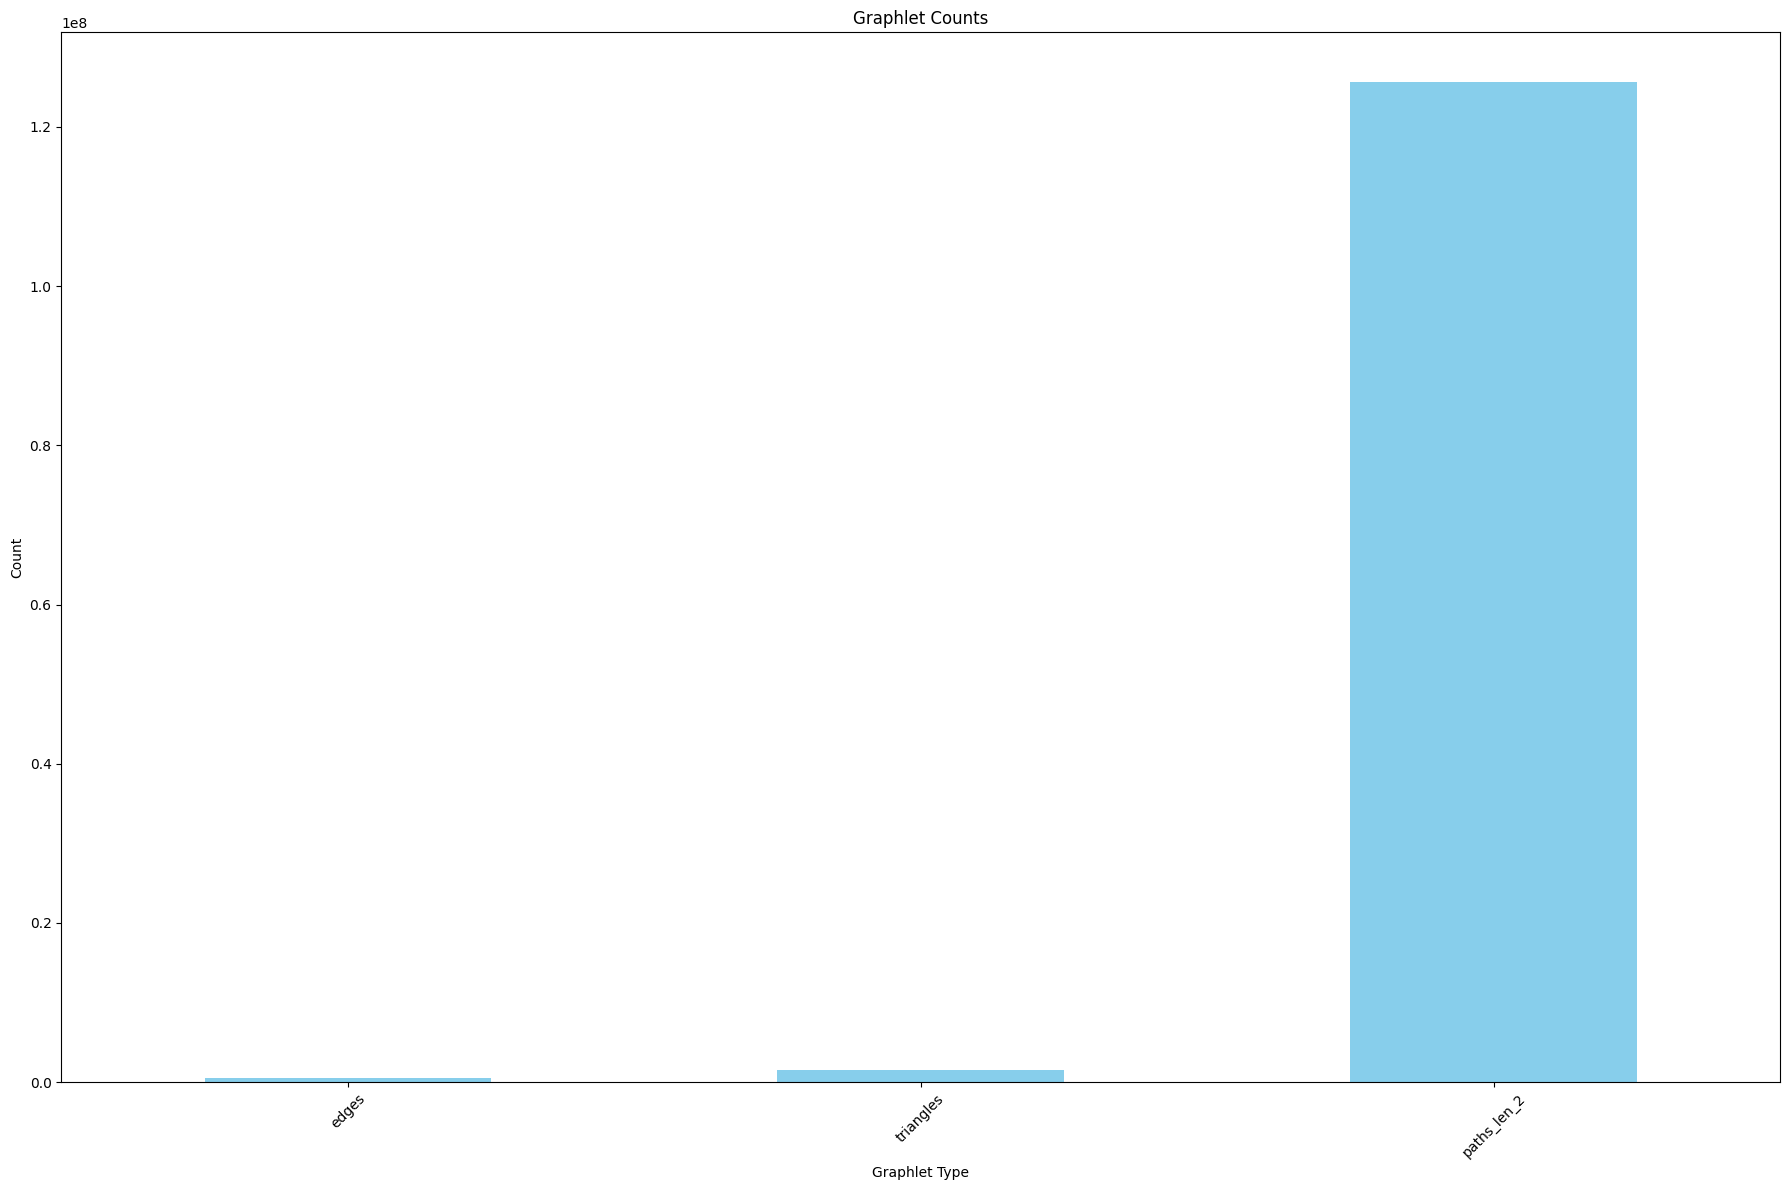

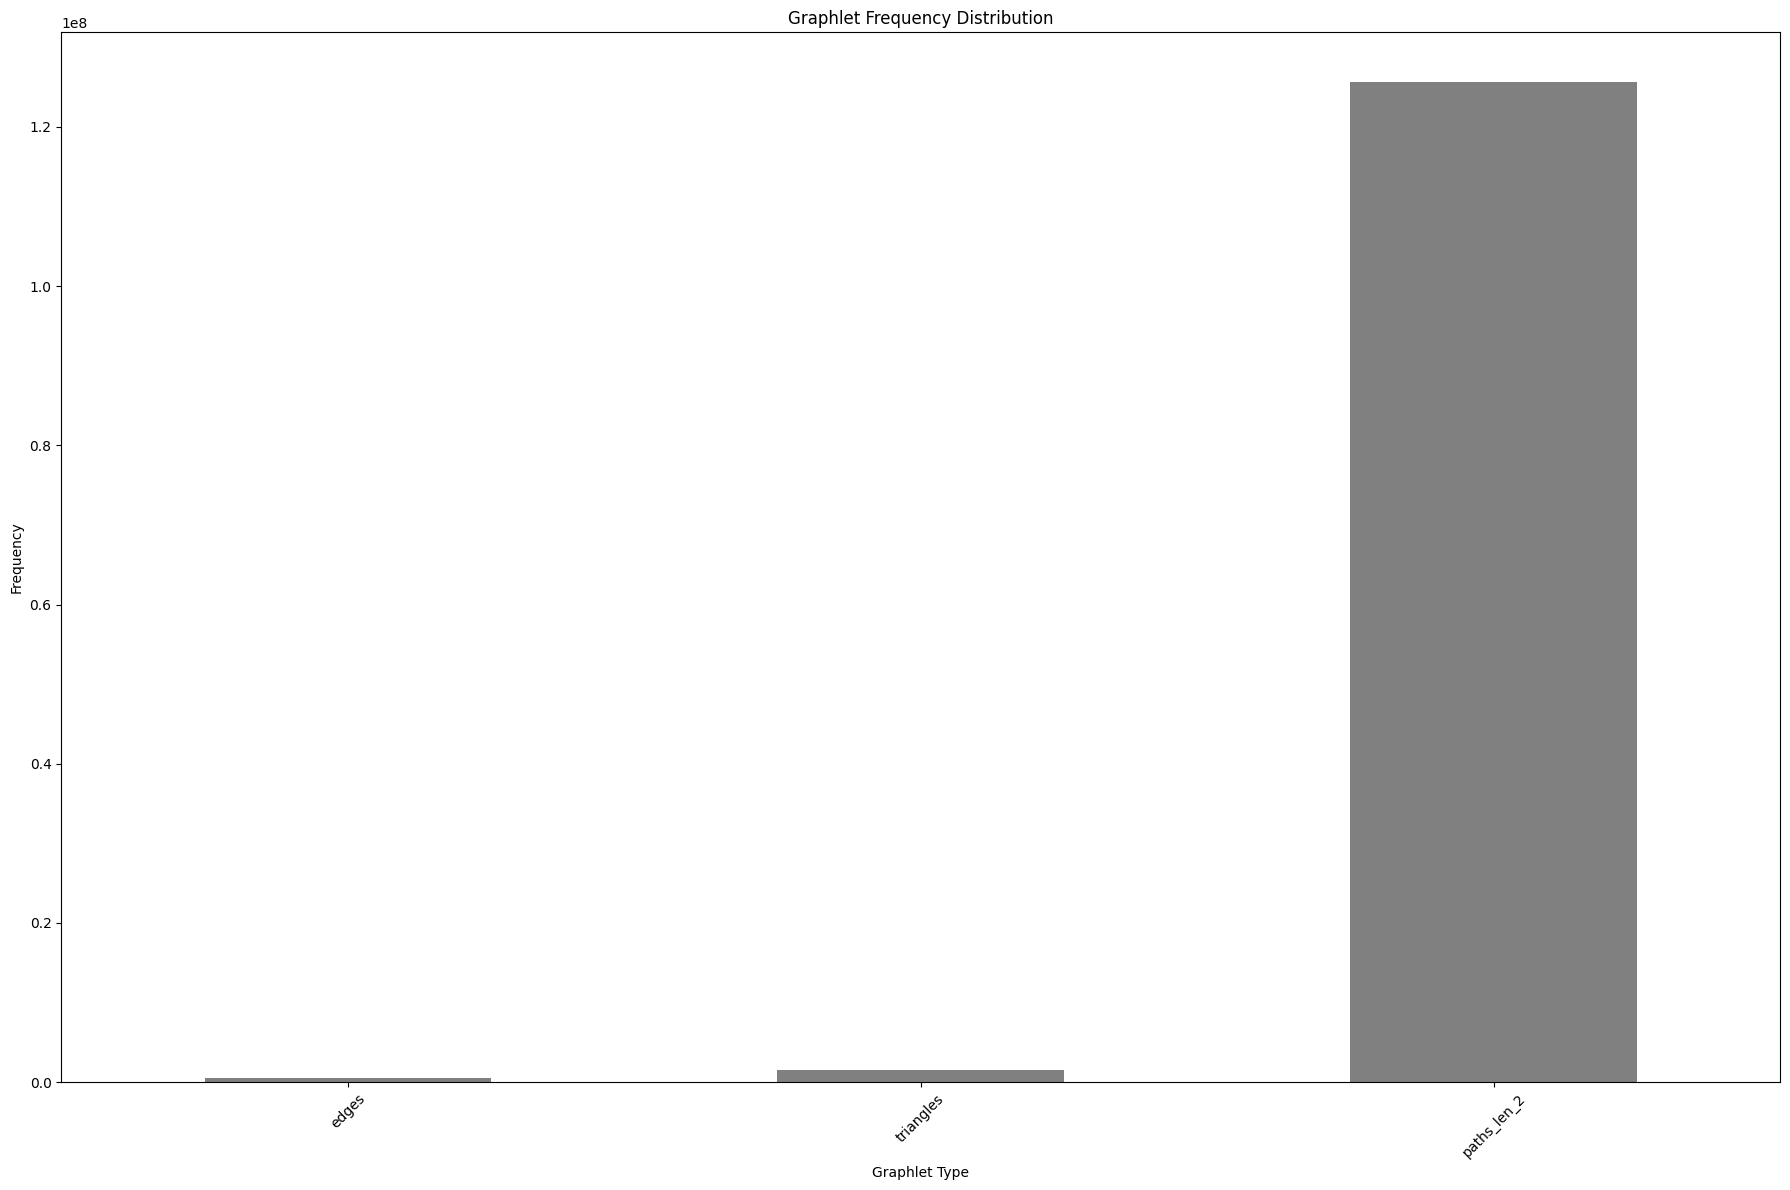

In [50]:
visualize_graphlet('skyblue', 'Graphlet Counts', 'Count')
visualize_graphlet('gray', 'Graphlet Frequency Distribution', 'Frequency')

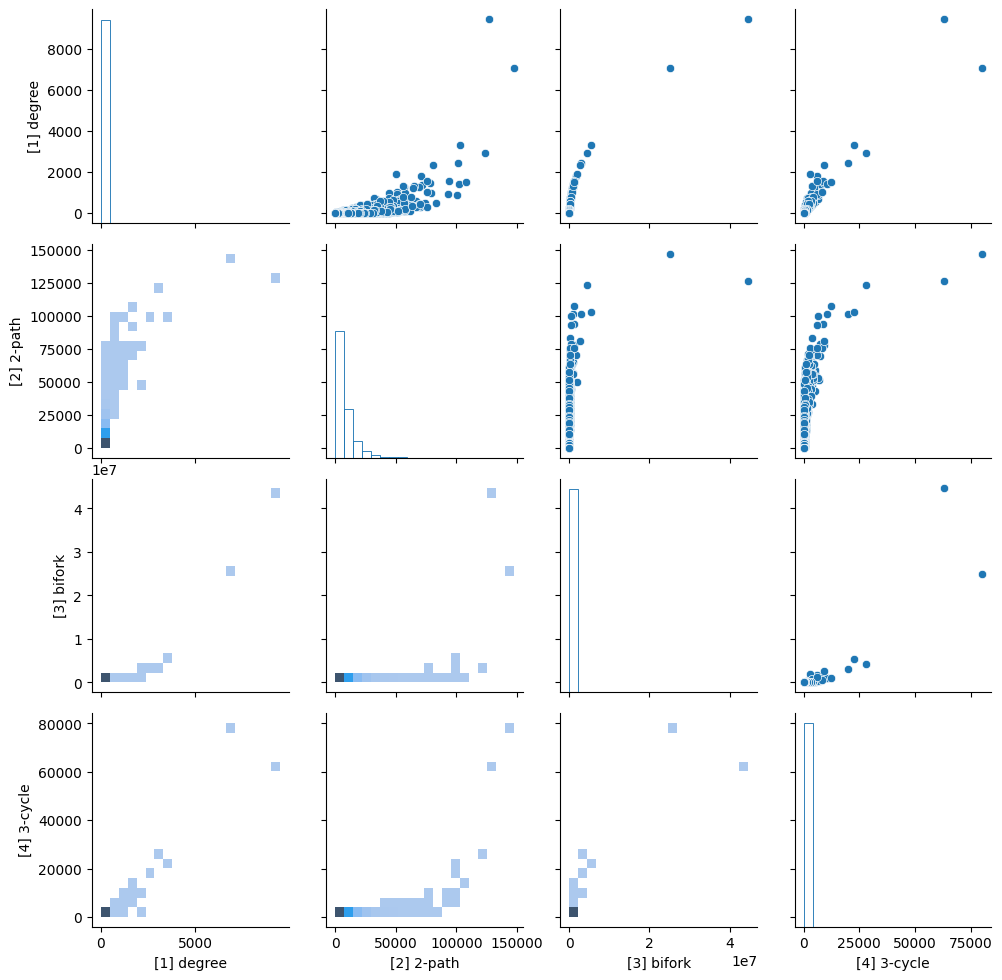

In [51]:
import seaborn as sns
pg = sns.PairGrid(F.iloc[:,1:5])
pg.map_diag(sns.histplot, fill=False, bins = 20)
pg.map_upper(sns.scatterplot)
pg.map_lower(sns.histplot, bins = 20)